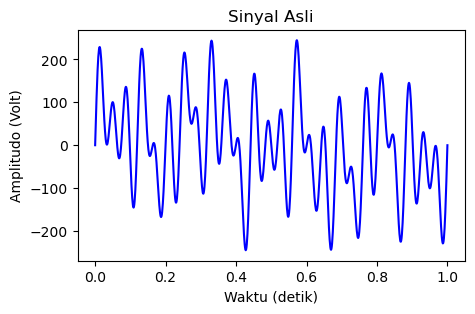

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(frequencies, amplitudes, t):
    signal = np.zeros_like(t)
    for f, A in zip(frequencies, amplitudes):
        signal += A * np.sin(2 * np.pi * f * t)
    return signal

frequencies = [1, 4, 9, 16, 25]  
amplitudes = [36, 49, 64, 81, 100]  
t_sampled = np.linspace(0, 1, 1000)  
signal_sampled = generate_signal(frequencies, amplitudes, t_sampled)

plt.figure(figsize=(5, 3))
plt.plot(t_sampled, signal_sampled, label='Sinyal Asli (Gabungan Sinus)', color='blue')
plt.title('Sinyal Asli')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo (Volt)')
plt.show()

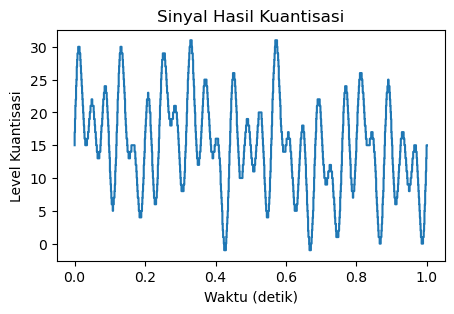

Level Kuantisasi 20 data awal
Nilai Kuantisasi: 0.00 -> Level Kuantisasi: 15.00
Nilai Kuantisasi: 30.59 -> Level Kuantisasi: 17.00
Nilai Kuantisasi: 61.19 -> Level Kuantisasi: 19.00
Nilai Kuantisasi: 91.78 -> Level Kuantisasi: 21.00
Nilai Kuantisasi: 107.08 -> Level Kuantisasi: 22.00
Nilai Kuantisasi: 137.67 -> Level Kuantisasi: 24.00
Nilai Kuantisasi: 152.97 -> Level Kuantisasi: 25.00
Nilai Kuantisasi: 183.56 -> Level Kuantisasi: 27.00
Nilai Kuantisasi: 198.86 -> Level Kuantisasi: 28.00
Nilai Kuantisasi: 214.16 -> Level Kuantisasi: 29.00
Nilai Kuantisasi: 214.16 -> Level Kuantisasi: 29.00
Nilai Kuantisasi: 229.45 -> Level Kuantisasi: 30.00
Nilai Kuantisasi: 229.45 -> Level Kuantisasi: 30.00
Nilai Kuantisasi: 229.45 -> Level Kuantisasi: 30.00
Nilai Kuantisasi: 229.45 -> Level Kuantisasi: 30.00
Nilai Kuantisasi: 214.16 -> Level Kuantisasi: 29.00
Nilai Kuantisasi: 214.16 -> Level Kuantisasi: 29.00
Nilai Kuantisasi: 198.86 -> Level Kuantisasi: 28.00
Nilai Kuantisasi: 183.56 -> Level Kuant

In [2]:
num_bits = 5
q_levels = 2 ** num_bits 
V_min = np.min(signal_sampled)
V_max = np.max(signal_sampled) 
quantization_step = (V_max - V_min) / q_levels

signal_quantized = quantization_step * np.round(signal_sampled / quantization_step)
signal_quantized_level = ((signal_quantized - V_min) / quantization_step) - 1

plt.figure(figsize=(5,3))
plt.step(t_sampled, signal_quantized_level, label='Sinyal Kuantisasi (16-bit)')
plt.title('Sinyal Hasil Kuantisasi')
plt.xlabel('Waktu (detik)')
plt.ylabel('Level Kuantisasi')
plt.show()

print("Level Kuantisasi 20 data awal")
for i in range(20):
    print(f"Nilai Kuantisasi: {signal_quantized[i]:.2f} -> Level Kuantisasi: {signal_quantized_level[i]:.2f}")

In [3]:
num_bits = 5
q_levels = 2 ** num_bits 
def pcm_encoding(signal, num_bits):
    encoded_signal = []
    for sample in signal:
        encoded_signal.append(format(int(sample), f'0{num_bits}b'))
    return encoded_signal

encoding_data = np.arange(q_levels)
pcm_encoded_signal = pcm_encoding(encoding_data, num_bits)

print("Contoh Encoding Biner (3-bit):")
for i in range(q_levels):
    print(f"Level Kuantisasi: {encoding_data[i]:.2f} -> Encoding Biner: {pcm_encoded_signal[i]}")


Contoh Encoding Biner (3-bit):
Level Kuantisasi: 0.00 -> Encoding Biner: 00000
Level Kuantisasi: 1.00 -> Encoding Biner: 00001
Level Kuantisasi: 2.00 -> Encoding Biner: 00010
Level Kuantisasi: 3.00 -> Encoding Biner: 00011
Level Kuantisasi: 4.00 -> Encoding Biner: 00100
Level Kuantisasi: 5.00 -> Encoding Biner: 00101
Level Kuantisasi: 6.00 -> Encoding Biner: 00110
Level Kuantisasi: 7.00 -> Encoding Biner: 00111
Level Kuantisasi: 8.00 -> Encoding Biner: 01000
Level Kuantisasi: 9.00 -> Encoding Biner: 01001
Level Kuantisasi: 10.00 -> Encoding Biner: 01010
Level Kuantisasi: 11.00 -> Encoding Biner: 01011
Level Kuantisasi: 12.00 -> Encoding Biner: 01100
Level Kuantisasi: 13.00 -> Encoding Biner: 01101
Level Kuantisasi: 14.00 -> Encoding Biner: 01110
Level Kuantisasi: 15.00 -> Encoding Biner: 01111
Level Kuantisasi: 16.00 -> Encoding Biner: 10000
Level Kuantisasi: 17.00 -> Encoding Biner: 10001
Level Kuantisasi: 18.00 -> Encoding Biner: 10010
Level Kuantisasi: 19.00 -> Encoding Biner: 10011